In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from fpdf import FPDF

df = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', encoding='ISO-8859-1', sep=';', low_memory=False)
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DISTÂNCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTÁCIO DE SÁ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DISTÂNCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMÁCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,04/04/2003,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,07/12/1977,N,SUDESTE,SP,SAO PAULO


In [3]:
# ANÁLISE EXPLORATÓRIA
print("Análise exploratória:")
print("Total de linhas:", len(df))
print("\nResumo estatístico:")
print(df.describe())
print("\nQuantidade de valores NaN por coluna:")
print(df.isna().sum())

Análise exploratória:
Total de linhas: 166830

Resumo estatístico:
       ANO_CONCESSAO_BOLSA  CODIGO_EMEC_IES_BOLSA
count             166830.0          166830.000000
mean                2020.0            2270.745022
std                    0.0            4063.329275
min                 2020.0              10.000000
25%                 2020.0             322.000000
50%                 2020.0            1196.000000
75%                 2020.0            1952.000000
max                 2020.0           24488.000000

Quantidade de valores NaN por coluna:
ANO_CONCESSAO_BOLSA                0
CODIGO_EMEC_IES_BOLSA              0
NOME_IES_BOLSA                     0
MUNICIPIO                          0
CAMPUS                             0
TIPO_BOLSA                         0
MODALIDADE_ENSINO_BOLSA            0
NOME_CURSO_BOLSA                  38
NOME_TURNO_CURSO_BOLSA             0
CPF_BENEFICIARIO                   0
SEXO_BENEFICIARIO                  0
RACA_BENEFICIARIO                  0


In [4]:
# EXCLUINDO OS RESULTADOS NULOS
df.dropna(inplace=True)

In [5]:
print("Analise exploratoria: ")
print("Total de linhas: ", len(df))
print("Resumo estatistico:\n", df.describe())
print("\n")

Analise exploratoria: 
Total de linhas:  166792
Resumo estatistico:
        ANO_CONCESSAO_BOLSA  CODIGO_EMEC_IES_BOLSA
count             166792.0          166792.000000
mean                2020.0            2270.993345
std                    0.0            4063.685981
min                 2020.0              10.000000
25%                 2020.0             322.000000
50%                 2020.0            1196.000000
75%                 2020.0            1952.000000
max                 2020.0           24488.000000




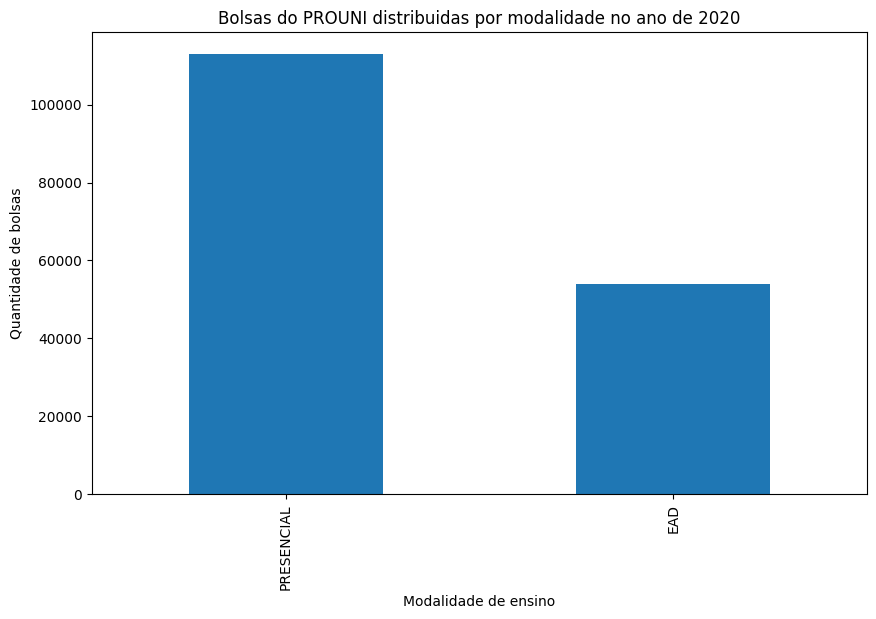

In [6]:
#gerar gráfico modalidade de ensino PROUNI 2020
state_counts = df['MODALIDADE_ENSINO_BOLSA'].value_counts()
state_counts.plot(kind='bar', title='Bolsas do PROUNI distribuidas por modalidade no ano de 2020', figsize=(10, 6))
plt.xlabel('Modalidade de ensino')
plt.ylabel('Quantidade de bolsas')
plt.show()


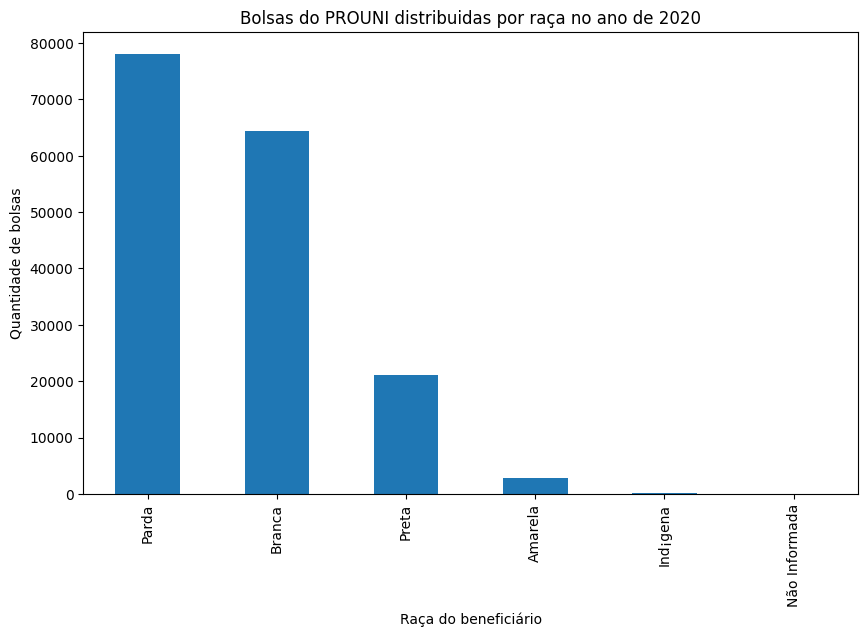

In [7]:
#gerar gráfico modalidade de ensino PROUNI 2020
state_counts = df['RACA_BENEFICIARIO'].value_counts()
state_counts.plot(kind='bar', title='Bolsas do PROUNI distribuidas por raça no ano de 2020', figsize=(10, 6))
plt.xlabel('Raça do beneficiário')
plt.ylabel('Quantidade de bolsas')
plt.show()

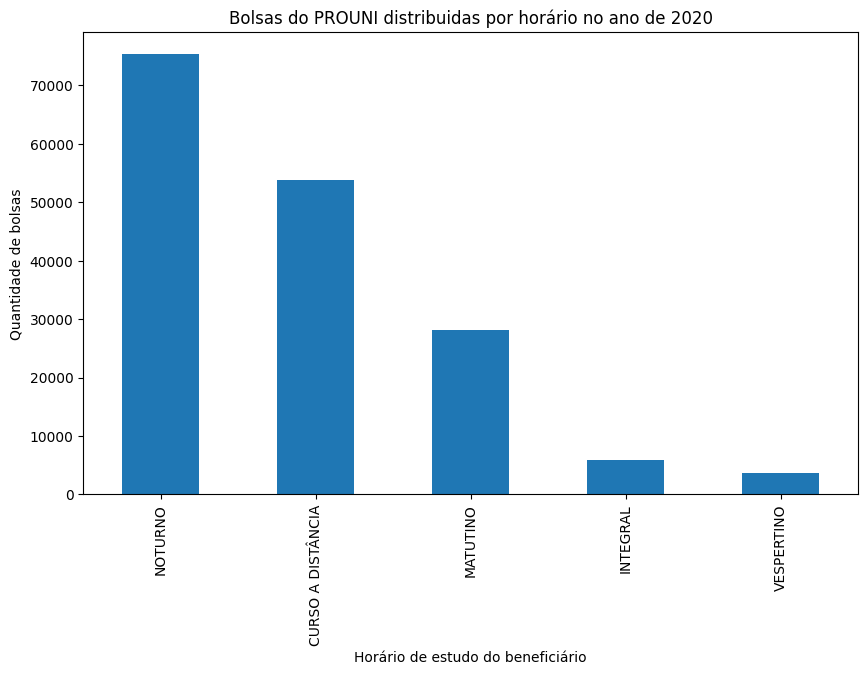

In [8]:
#gerar gráfico modalidade de ensino PROUNI 2020
state_counts = df['NOME_TURNO_CURSO_BOLSA'].value_counts()
state_counts.plot(kind='bar', title='Bolsas do PROUNI distribuidas por horário no ano de 2020', figsize=(10, 6))
plt.xlabel('Horário de estudo do beneficiário')
plt.ylabel('Quantidade de bolsas')
plt.show()

In [9]:
#gerar arquivo pdf - gráfico 1/3
from fpdf import FPDF
pdf = FPDF('L', 'mm', 'A4')
pdf.add_page()
pdf.set_font('helvetica', '', 16)
pdf.cell(w=0, h=0, txt="Bolsas do PROUNI distribuidas por modalidade no ano de 2020", align='C')

pdf.image(name="grafico_modalidade.png", x=0, y=20, w=200)
pdf.output("prouni1.pdf")
print("pdf1 salvo")



pdf1 salvo


In [10]:
#gerar arquivo pdf - gráfico 2/3
from fpdf import FPDF
pdf = FPDF('L', 'mm', 'A4')
pdf.add_page()
pdf.set_font('helvetica', '', 16)
pdf.cell(w=0, h=0, txt="Bolsas do PROUNI distribuidas por raça no ano de 2020", align='C')

pdf.image(name="grafico_raca.png", x=0, y=20, w=200)
pdf.output("prouni2.pdf")
print("pdf2 salvo")

pdf2 salvo


In [11]:
#gerar arquivo pdf - gráfico 3/3
from fpdf import FPDF
pdf = FPDF('L', 'mm', 'A4')
pdf.add_page()
pdf.set_font('helvetica', '', 16)
pdf.cell(w=0, h=0, txt="Bolsas do PROUNI distribuidas por horário no ano de 2020", align='C')

pdf.image(name="grafico_horario.png", x=0, y=20, w=200)
pdf.output("prouni3.pdf")
print("pdf3 salvo")

pdf3 salvo


In [12]:
#gerar relatório de conclusão da pesquisa 
import os
from fpdf import FPDF

pdf = FPDF('L', 'mm', 'A4')
pdf.add_page()
pdf.set_font('Times', '', 16)

texto = "Detalhamento quantitativo das bolsas concedidas pelo Prouni por ano\n\nAtravés da interpretação dos gráficos, podemos concluir que a maioria dos alunos preferem estudar na modalidade presencial. Grande parte dos alunos beneficiados pelas bolsas de estudo de até cem por centro do PROUNI são da raça parda e branca. E a maioria dos alunos estudam no período noturno, provavelmente por trabalharem durante o dia.\n fonte: https://dadosabertos.mec.gov.br/images/conteudo/prouni/2020/ProuniRelatorioDadosAbertos2020.csv"

pdf.cell(w=0, h=7, txt=texto)

# Construir o PDF
pdf.output("relatorio.pdf")
print("pdf4 salvo")


pdf4 salvo


In [13]:
#importa bibliotecas
import os
import glob
from PyPDF2 import PdfReader, PdfWriter

#função para unificar os pdfs e criar uma nova pasta concatenando
def concatenaPdf(caminho):
    os.chdir(caminho)
    arquivos = glob.glob('*.pdf')
    destino = r'C:\Users\User\Desktop\Desafio Final Python - Copia\pdf_projeto'

#cria o diretório de resultado, caso não exita
    if not os.path.exists(destino):
        os.makedirs(destino)
        print('Diretório de destino criado')
    else:
        print('Diretório de destino já existe')

    pdfWriter = PdfWriter()

#adiciona todas as páginas de cada arquivo
    for arquivo in arquivos:
        with open(arquivo, 'rb') as pdfDoc:
            pdfReader = PdfReader(pdfDoc)
            for pagina in pdfReader.pages:
                pdfWriter.add_page(pagina)

    pdfResultado = os.path.join(destino, 'concatenado.pdf')
    with open(pdfResultado, 'wb') as pdfOutput:
        pdfWriter.write(pdfOutput)

    print('PDFs concatenados com sucesso!')

concatenaPdf(r'C:\Users\User\Desktop\Desafio Final Python - Copia\pdf_projeto')


Diretório de destino já existe
PDFs concatenados com sucesso!
